<a href="https://colab.research.google.com/github/godwins3/ml-playground/blob/main/my_tutorials/mpesa_statement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 74.1 MB/s eta 0:00:00


Convert pdf to csv

In [ ]:
# Import the required Module
import tabula
# Read a PDF File
df = tabula.read_pdf("/content/mpesa_statement.pdf", pages='all')[0]
# convert PDF into CSV
tabula.convert_into("/content/mpesa_statement.pdf", "mpesa_statement.csv", output_format="csv", pages='all')
print(df)

Dec 05, 2023 7:54:31 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Dec 05, 2023 7:54:31 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Dec 05, 2023 7:54:31 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>




Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 1]
Index: []


In [ ]:
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv('mpesa_statement.csv')
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,NaN,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,NaN,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,NaN,-85,18.26


Clean And analyze dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Receipt No.         289 non-null    object
 1   Completion Time     289 non-null    object
 2   Details             289 non-null    object
 3   Transaction Status  289 non-null    object
 4   Paid In             80 non-null     object
 5   Withdrawn           210 non-null    object
 6   Balance             289 non-null    object
dtypes: object(7)
memory usage: 15.9+ KB


In [ ]:
df.describe()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
count,289,289,289,289,80,210,289
unique,237,220,127,2,44,74,250
top,RHV0K6ZLW6,8/31/2023 21:22,Customer Transfer of FundsCharge,Completed,100,-20,0
freq,3,3,21,288,16,20,21


In [ ]:
# check null values
df.isnull().sum()

Receipt No.             0
Completion Time         0
Details                 0
Transaction Status      0
Paid In               209
Withdrawn              79
Balance                 0
dtype: int64

In [ ]:
# replace null values woth 0
df.fillna(0)

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,0,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,0,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,0,-85,18.26
...,...,...,...,...,...,...,...
284,RI16KWERTE,9/1/2023 9:13,OD Loan Repayment to 232323 -M-PESA Overdraw,Completed,0,-1.95,327.05
285,RI13KWESJZ,9/1/2023 9:13,Funds received from -2547******648 JOASH MBOGO,Completed,329,0,329
286,RHV0K6ZLW6,8/31/2023 21:22,Pay Bill Charge,Completed,0,-5,0
287,RHV0K6ZLW6,8/31/2023 21:22,Pay Bill Online Fuliza M-Pesa to542542 - IM BA...,Completed,0,-400,5


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,NaN,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,NaN,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,NaN,-85,18.26


In [ ]:
df.fillna(0, inplace=True)


In [ ]:
df.isnull()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
284,False,False,False,False,False,False,False
285,False,False,False,False,False,False,False
286,False,False,False,False,False,False,False
287,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Receipt No.           0
Completion Time       0
Details               0
Transaction Status    0
Paid In               0
Withdrawn             0
Balance               0
dtype: int64

In [ ]:
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,0,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,0,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,0,-85,18.26


In [ ]:
for index, value in enumerate(df['Paid In']):
    if isinstance(value, str):
        try:
            # Attempt to convert the string to a float and then round to an integer
            # print(value)
            rounded_value = int(float(value))
            # print(rounded_value)
            df.at[index, 'Paid In'] = rounded_value
        except ValueError:
            # Handle the case where the string cannot be converted to a float
            print(f"Value at index {index} is not convertible to a float: {value}")
    elif isinstance(value, float):
        # Round floating-point values to integers
        df.at[index, 'Paid In'] = round(value)

Value at index 11 is not convertible to a float: 6,550.00
Value at index 44 is not convertible to a float: 2,400.00
Value at index 54 is not convertible to a float: 1,200.00
Value at index 88 is not convertible to a float: 10,000.00
Value at index 103 is not convertible to a float: Paid In
Value at index 135 is not convertible to a float: 1,910.00
Value at index 137 is not convertible to a float: 1,000.00
Value at index 157 is not convertible to a float: 1,000.00
Value at index 180 is not convertible to a float: 1,000.00
Value at index 201 is not convertible to a float: 1,000.00
Value at index 217 is not convertible to a float: 12,000.00
Value at index 231 is not convertible to a float: 1,500.00
Value at index 240 is not convertible to a float: 5,000.00
Value at index 243 is not convertible to a float: 1,000.00
Value at index 247 is not convertible to a float: 10,000.00
Value at index 250 is not convertible to a float: 1,000.00
Value at index 259 is not convertible to a float: 2,500.00

In [ ]:
# Initialize a list to store the index positions with string data type
string_index_positions = []

# Iterate through the 'Paid In' column
for index, value in enumerate(df['Paid In']):
    if isinstance(value, str):
        string_index_positions.append(index)

print(string_index_positions)

[11, 44, 54, 88, 103, 135, 137, 157, 180, 201, 217, 231, 240, 243, 247, 250, 259, 263, 270]


In [ ]:
# Specify the index of the row you want to drop
row_index = 103  # Replace this with the index you want to drop

# Use the drop() method to drop the row by index
df = df.drop(row_index)

# The row with the specified index is now removed from the DataFrame

In [ ]:
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,0,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31,0,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,0,-85,18.26


In [ ]:
# dropping a column method 1
column_to_drop = 'Receipt No.'
df = df.drop(column_to_drop, axis=1)

In [ ]:
df.head()

,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-45,0
1,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,0,45
2,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,-50,0
3,9/21/2023 9:14,OverDraft of Credit Party,Completed,31,0,50
4,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,0,-85,18.26


In [ ]:
# dropping a column method 2
column_to_drop = 'Withdrawn'
del df[column_to_drop]

In [ ]:
df.head()

,Completion Time,Details,Transaction Status,Paid In,Balance
0,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,0
1,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,45
2,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,0,0
3,9/21/2023 9:14,OverDraft of Credit Party,Completed,31,50
4,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,0,18.26


In [ ]:
# Define a function to clean and convert values to integers
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(filter(str.isdigit, str(value)))  # Remove non-numeric character
        return int(cleaned_value)
    except ValueError:
        return None  # Return None for values that cannot be converted

# Apply the clean_and_convert function to the 'Paid In' column
df['Paid In'] = df['Paid In'].apply(clean_and_convert)

# Calculate the sum of the 'Paid In' column
received_total = df['Paid In'].sum()
print(f"Total Amount Received in a month: {received_total}")


Total Amount Received in a month: 7512907


Data visualization with matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('classic')

In [ ]:
import numpy as np

In [ ]:
#importing the libraries
import numpy as np
from numpy import int64
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#importing the mpesa data and viewing the first 5 rows
df = pd.read_csv('mpesa_statement.csv', encoding='ISO-8859-1')

df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,NaN,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,NaN,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,NaN,-85,18.26


In [ ]:
df.dtypes

Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [ ]:
#filling null with 0
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Receipt No.           0
Completion Time       0
Details               0
Transaction Status    0
Paid In               0
Withdrawn             0
Balance               0
dtype: int64

In [ ]:
for index, value in enumerate(df['Paid In']):
    if isinstance(value, str):
        try:
            # Attempt to convert the string to a float and then round to an integer
            # print(value)
            rounded_value = int(float(value))
            # print(rounded_value)
            df.at[index, 'Paid In'] = rounded_value
        except ValueError:
            # Handle the case where the string cannot be converted to a float
            print(f"Value at index {index} is not convertible to a float: {value}")
    elif isinstance(value, float):
        # Round floating-point values to integers
        df.at[index, 'Paid In'] = round(value)

Value at index 11 is not convertible to a float: 6,550.00
Value at index 44 is not convertible to a float: 2,400.00
Value at index 54 is not convertible to a float: 1,200.00
Value at index 88 is not convertible to a float: 10,000.00
Value at index 103 is not convertible to a float: Paid In
Value at index 135 is not convertible to a float: 1,910.00
Value at index 137 is not convertible to a float: 1,000.00
Value at index 157 is not convertible to a float: 1,000.00
Value at index 180 is not convertible to a float: 1,000.00
Value at index 201 is not convertible to a float: 1,000.00
Value at index 217 is not convertible to a float: 12,000.00
Value at index 231 is not convertible to a float: 1,500.00
Value at index 240 is not convertible to a float: 5,000.00
Value at index 243 is not convertible to a float: 1,000.00
Value at index 247 is not convertible to a float: 10,000.00
Value at index 250 is not convertible to a float: 1,000.00
Value at index 259 is not convertible to a float: 2,500.00

In [ ]:
# Specify the index of the row you want to drop
row_index = 103  # Replace this with the index you want to drop

# Use the drop() method to drop the row by index
df = df.drop(row_index)

# The row with the specified index is now removed from the DataFrame

In [ ]:
# dropping a column method 1
column_to_drop = 'Receipt No.'
df = df.drop(column_to_drop, axis=1)

In [ ]:
# Define a function to clean and convert values to integers
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(filter(str.isdigit, str(value)))  # Remove non-numeric character
        return int(cleaned_value)
    except ValueError:
        return None  # Return None for values that cannot be converted

# Apply the clean_and_convert function to the 'Paid In' column
df['Paid In'] = df['Paid In'].apply(clean_and_convert)

# Calculate the sum of the 'Paid In' column
received_total = df['Paid In'].sum()
print(f"Total Amount Received in a month: {received_total}")

Total Amount Received in a month: 7512907


In [ ]:
#sorting values using date dataframe
df=df.sort_values(by=['Completion Time'])

In [ ]:
#Filtering the Amount used to pay bills through MPESA
matchers = 'Pay Bill Charge'
df['PBC rows'] = df['Details'].str.find(matchers)

In [ ]:
df1 = df[df['PBC rows'] == 0]

In [ ]:
df1.head()

,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,PBC rows
286,8/31/2023 21:22,Pay Bill Charge,Completed,0,-5,0,0
72,9/14/2023 16:28,Pay Bill Charge,Completed,0,-5,"2,418.68",0
260,9/2/2023 10:13,Pay Bill Charge,Completed,0,-10,427.79,0
190,9/5/2023 16:02,Pay Bill Charge,Completed,0,-48,59.64,0
199,9/5/2023 8:27,Pay Bill Charge,Completed,0,-5,"10,784.64",0


In [ ]:
print('Total amount is:', df['Paid In'].sum())
print('Highest amount is:', df['Paid In'].max())
print('Lowest amount is:', df['Paid In'].min())
print('Average amount is:', df['Paid In'].mean())
print('Median amount is:', df['Paid In'].median())
print('Mode amount is:', df['Paid In'].mode())

Total amount is: 7512907
Highest amount is: 1500000
Lowest amount is: 0
Average amount is: 26086.48263888889
Median amount is: 0.0
Mode amount is: 0    0
Name: Paid In, dtype: int64


In [ ]:
for index, value in enumerate(df['Withdrawn']):
    if isinstance(value, str):
        try:
            # Attempt to convert the string to a float and then round to an integer
            # print(value)
            rounded_value = int(float(value))
            # print(rounded_value)
            df.at[index, 'Withdrawn'] = rounded_value
        except ValueError:
            # Handle the case where the string cannot be converted to a float
            print(f"Value at index {index} is not convertible to a float: {value}")
    elif isinstance(value, float):
        # Round floating-point values to integers
        df.at[index, 'Withdrawn'] = round(value)

Value at index 50 is not convertible to a float: -2,000.00
Value at index 56 is not convertible to a float: -5,000.00
Value at index 58 is not convertible to a float: -1,650.00
Value at index 112 is not convertible to a float: -14,500.00
Value at index 118 is not convertible to a float: -2,500.00
Value at index 128 is not convertible to a float: -1,000.00
Value at index 130 is not convertible to a float: -8,500.00
Value at index 131 is not convertible to a float: -1,000.00
Value at index 138 is not convertible to a float: -5,000.00
Value at index 144 is not convertible to a float: -1,000.00
Value at index 154 is not convertible to a float: -6,000.00
Value at index 164 is not convertible to a float: -1,000.00
Value at index 208 is not convertible to a float: -1,400.00
Value at index 267 is not convertible to a float: -1,500.00


In [ ]:
# Define a function to clean and convert values to integers
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(filter(str.isdigit, str(value)))  # Remove non-numeric character
        return int(cleaned_value)
    except ValueError:
        return None  # Return None for values that cannot be converted

# Apply the clean_and_convert function to the 'Paid In' column
df['Withdrawn'] = df['Withdrawn'].apply(clean_and_convert)

# Calculate the sum of the 'Withdrawn' column
withdrawn_total = df['Withdrawn'].sum()
print(f"Total Amount Withdrawn in a month: {withdrawn_total}")

Total Amount Withdrawn in a month: 3004892


In [ ]:
# import seaborn
import seaborn as sns

In [ ]:
df.dtypes

Completion Time       object
Details               object
Transaction Status    object
Paid In                int64
Withdrawn              int64
Balance               object
PBC rows               int64
dtype: object

<Axes: xlabel='Completion Time', ylabel='Paid In'>

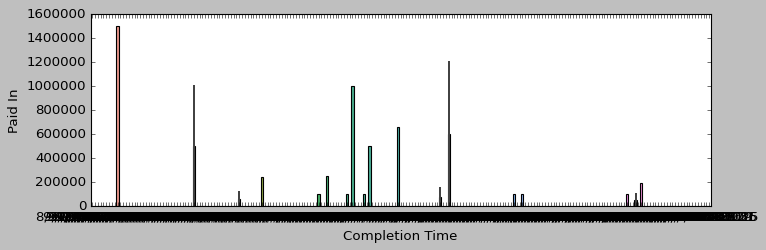

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, x='Completion Time', y='Paid In')

<function matplotlib.pyplot.show(close=None, block=None)>

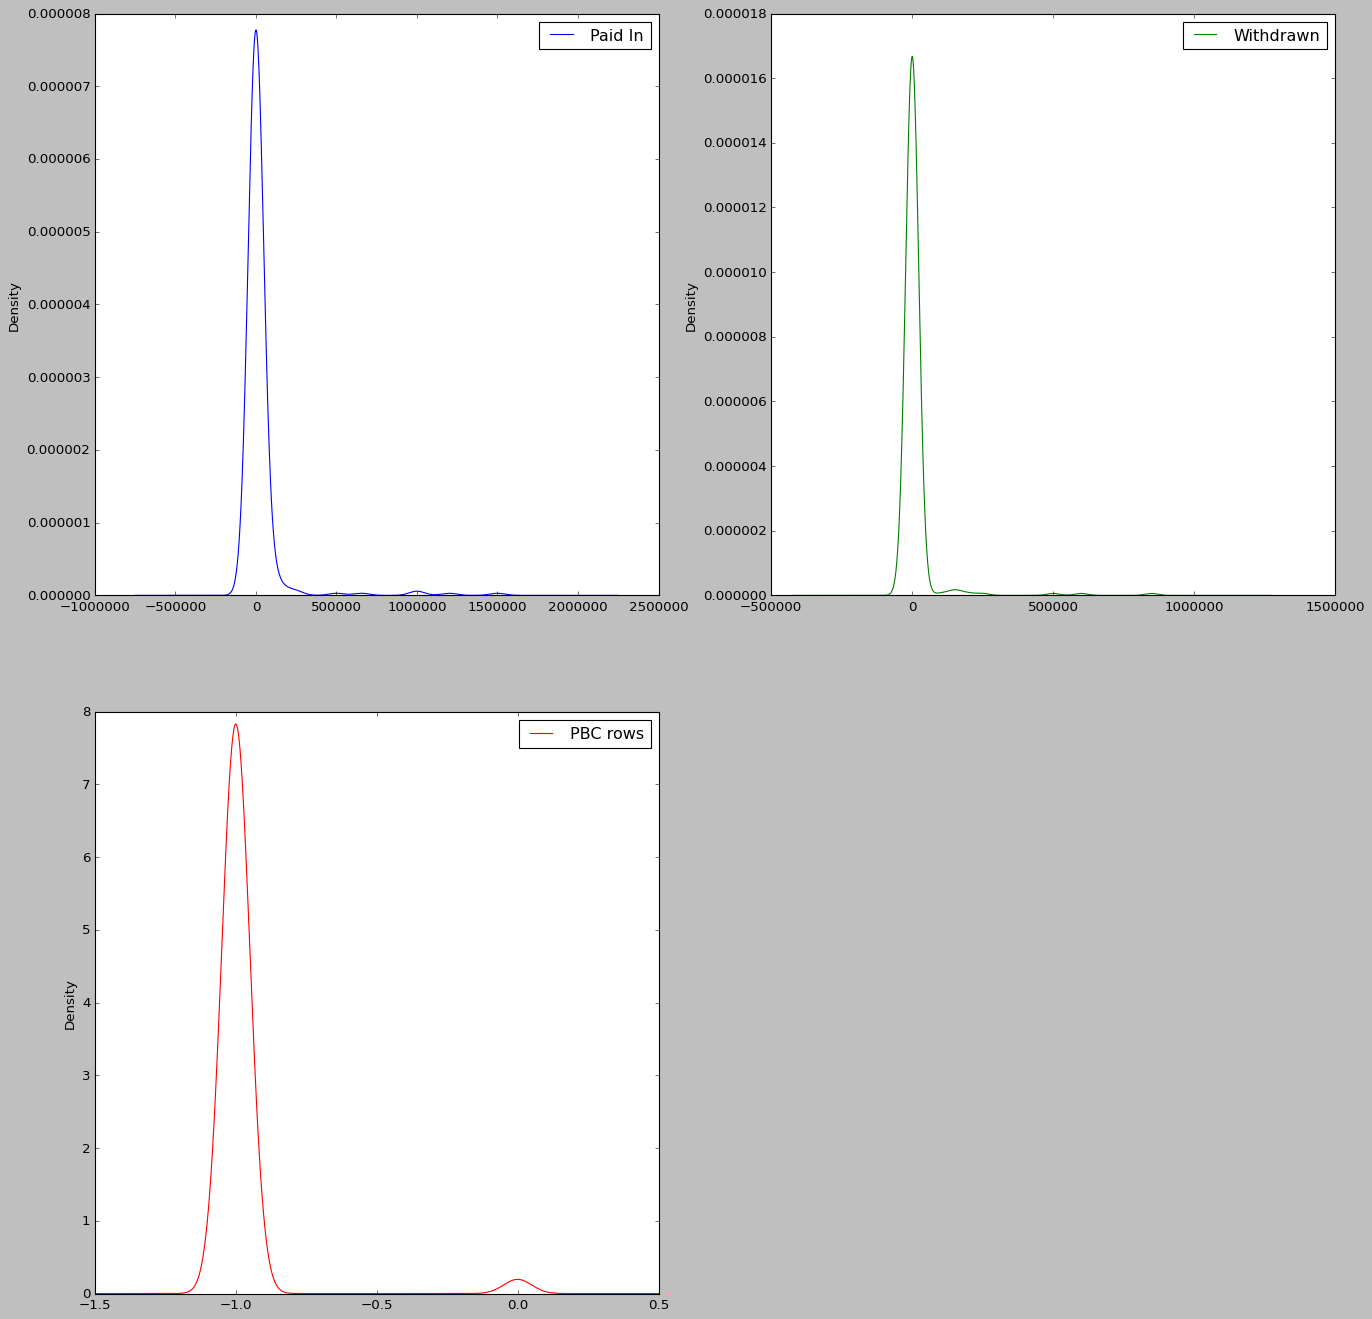

In [ ]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

Simple Scatter Plots

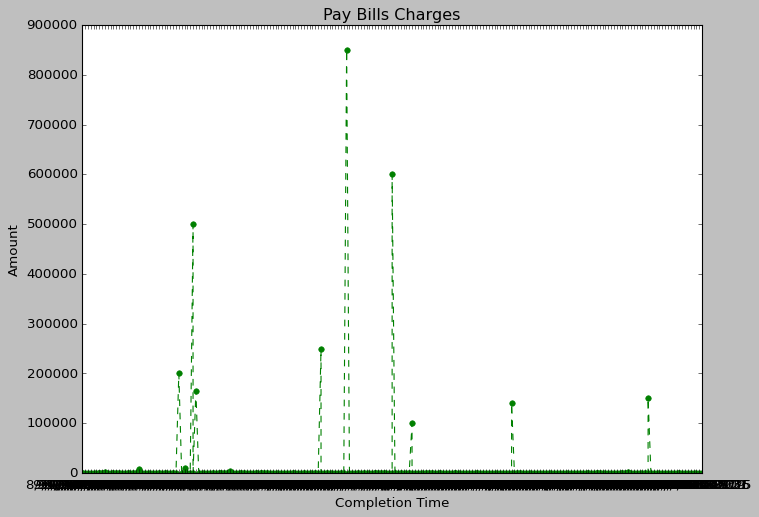

In [ ]:
plt.figure(figsize=(10,7))

plt.title('Pay Bills Charges')
plt.xlabel('Completion Time')
plt.ylabel('Amount')

plt.plot (df['Completion Time'], df.Withdrawn,  color='green', marker='.', markersize=10, linestyle='--')


plt.show()

In [ ]:
# Filtering the Airtime bought
matchers = 'Airtime Purchase'
df['Airtime rows'] = df['Details'].str.find(matchers)

In [ ]:
dfAir = df[df['Airtime rows'] == 0]

In [ ]:
print('Total amount is:', df['Withdrawn'].sum())
print('Highest amount is:', df['Withdrawn'].max())
print('Lowest amount is:', df['Withdrawn'].min())
print('Average amount is:', df['Withdrawn'].mean())
print('Median amount is:', df['Withdrawn'].median())
print('Mode amount is:', df['Withdrawn'].mode())

Total amount is: 3004892
Highest amount is: 850000
Lowest amount is: 0
Average amount is: 10433.652777777777
Median amount is: 40.0
Mode amount is: 0    0
Name: Withdrawn, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

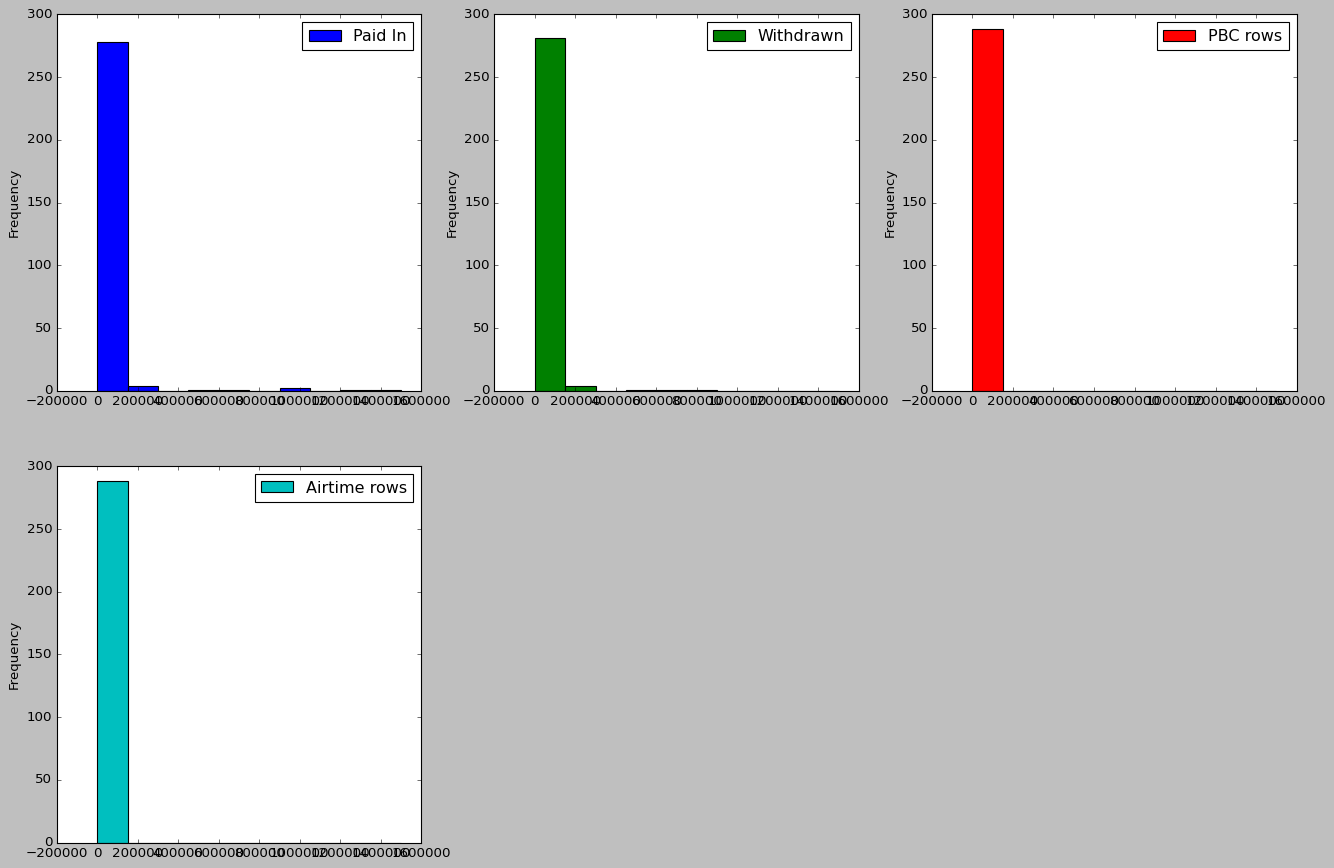

In [ ]:
df.plot(kind='hist', subplots=True, layout=(3,3), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

<Axes: xlabel='Completion Time', ylabel='count'>

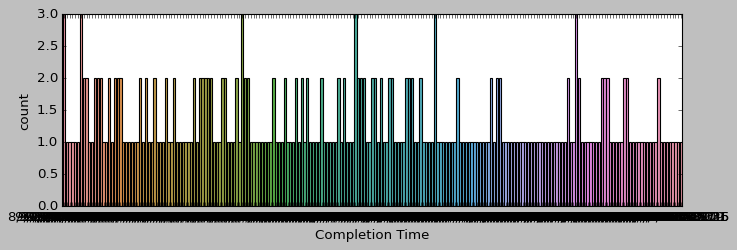

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x = 'Completion Time')

In [ ]:
df.head()

,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,PBC rows,Airtime rows
288,8/31/2023 21:22,OverDraft of Credit Party,Completed,1,0,405,-1,-1
286,8/31/2023 21:22,Pay Bill Charge,Completed,0,5,0,0,-1
287,8/31/2023 21:22,Pay Bill Online Fuliza M-Pesa to542542 - IM BA...,Completed,0,400,5,-1,-1
282,9/1/2023 11:38,Buy Bundles,Completed,0,20,321.05,-1,-1
281,9/1/2023 13:58,Airtime Purchase,Completed,0,350,301.05,-1,0
